<a href="https://www.kaggle.com/nimaabdpoor/flightdata-2021?scriptVersionId=84745363" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
import pickle
#import pydotplus





# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../input/flight-satisfaction-prediction'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

../input/flight-satisfaction-prediction/flight.csv


In [2]:
iowa_file_path = '../input/flight-satisfaction-prediction/flight.csv'
flight_data = pd.read_csv(iowa_file_path)


In [3]:
flight_data

,index,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,dissatisfied


In [4]:
flight_data.isna().sum()

index                                  0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [5]:
flight_data.info()
print('shape: ' ,flight_data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   index                              103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [6]:
flight_data.describe()

,index,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [7]:
flight_data.isnull()

,index,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
103900,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
103901,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
103902,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
flight_data['Arrival Delay in Minutes'] = flight_data['Arrival Delay in Minutes'].fillna(flight_data['Arrival Delay in Minutes'].mean())
#flight_data["Arrival Delay in Minutes"].replace({"nan": flight_data['Arrival Delay in Minutes'].mean()}, inplace=True)
flight_data.isna().sum()

index                                0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [9]:
features = ['Gender', 'Customer Type','Class','Flight Distance','satisfaction']
#plot = flight_data.plot.pie(y = 'Customer Type', figsize=(5, 5))

In [10]:
#plot = df.plot.pie(subplots=True, figsize=(11, 6))

In [11]:
gender_type = flight_data['Gender'].unique()
print(gender_type)

['Male' 'Female']


In [12]:
labelencoder = LabelEncoder()
flight_data['Gender'] = labelencoder.fit_transform(flight_data['Gender'])
flight_data['Customer Type'] = labelencoder.fit_transform(flight_data['Customer Type'])
flight_data['Class'] = labelencoder.fit_transform(flight_data['Class'])
flight_data['Type of Travel'] = labelencoder.fit_transform(flight_data['Type of Travel'])
flight_data['satisfaction'] = labelencoder.fit_transform(flight_data['satisfaction'])

flight_data

,index,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,1,0,13,1,2,460,3,4,...,5,4,3,4,4,5,5,25,18.0,0
1,1,5047,1,1,25,0,0,235,3,2,...,1,1,5,3,1,4,1,1,6.0,0
2,2,110028,0,0,26,0,0,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,3,24026,0,0,25,0,0,562,2,5,...,2,2,5,3,1,4,2,11,9.0,0
4,4,119299,1,0,61,0,0,214,3,3,...,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,0,1,23,0,1,192,2,1,...,2,3,1,4,2,3,2,3,0.0,0
103900,103900,73097,1,0,49,0,0,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,1
103901,103901,68825,1,1,30,0,0,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,0
103902,103902,54173,0,1,22,0,1,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,0


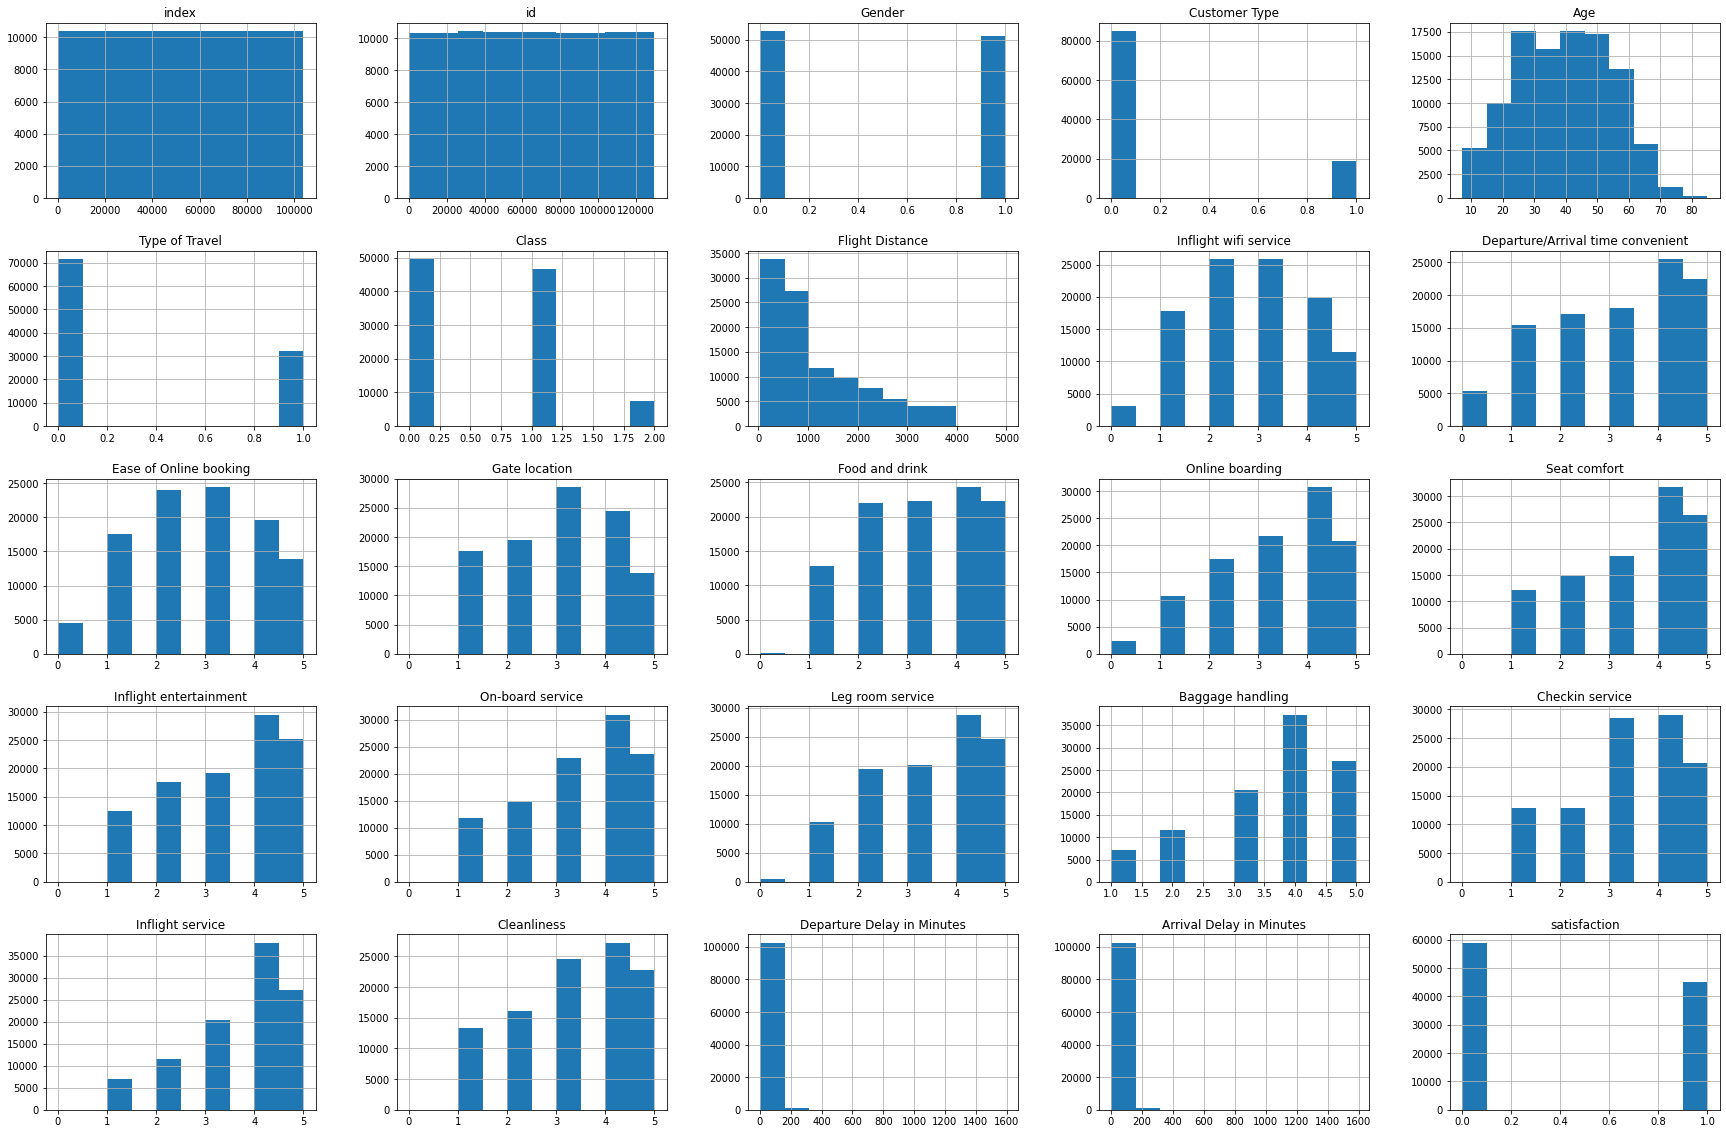

In [13]:
fig_dims = (30, 20)
ax = flight_data.hist(figsize=fig_dims)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:1213: UserWarning: The following kwargs were not used by contour: 'Label'
  **contour_kws,


<AxesSubplot:xlabel='Gender', ylabel='Class'>

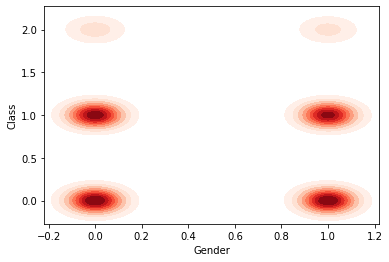

In [14]:
sns.kdeplot(flight_data['Gender'], 
            flight_data['Class'],
            color='r', shade=True, Label='flight_data',
            cmap="Reds", shade_lowest=False)

In [15]:
# Create X (After completing the exercise, you can return to modify this line!)
features = ['Gender', 'Customer Type', 'Age','Type of Travel','Class','Flight Distance', 
            'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink',
            'Online boarding', 'Seat comfort','Inflight entertainment', 'On-board service','Leg room service', 'Baggage handling', 
            'Checkin service','Inflight service','Cleanliness','Departure Delay in Minutes','Arrival Delay in Minutes']

In [16]:
# Select columns corresponding to features, and preview the data
X = flight_data[features]
X.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,0,13,1,2,460,3,4,3,1,...,5,5,4,3,4,4,5,5,25,18.0
1,1,1,25,0,0,235,3,2,3,3,...,1,1,1,5,3,1,4,1,1,6.0
2,0,0,26,0,0,1142,2,2,2,2,...,5,5,4,3,4,4,4,5,0,0.0
3,0,0,25,0,0,562,2,5,5,5,...,2,2,2,5,3,1,4,2,11,9.0
4,1,0,61,0,0,214,3,3,3,3,...,5,3,3,4,4,3,3,3,0,0.0


In [17]:
y = flight_data.satisfaction

In [18]:
flight_data

,index,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,1,0,13,1,2,460,3,4,...,5,4,3,4,4,5,5,25,18.0,0
1,1,5047,1,1,25,0,0,235,3,2,...,1,1,5,3,1,4,1,1,6.0,0
2,2,110028,0,0,26,0,0,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,3,24026,0,0,25,0,0,562,2,5,...,2,2,5,3,1,4,2,11,9.0,0
4,4,119299,1,0,61,0,0,214,3,3,...,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,0,1,23,0,1,192,2,1,...,2,3,1,4,2,3,2,3,0.0,0
103900,103900,73097,1,0,49,0,0,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,1
103901,103901,68825,1,1,30,0,0,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,0
103902,103902,54173,0,1,22,0,1,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,0


In [19]:
# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

In [20]:
# Define a random forest model
rf_model = RandomForestClassifier()
rf_model.fit(train_X, train_y)
rf_val_predictions = rf_model.predict(val_X)
rf_val_mae = mean_absolute_error(rf_val_predictions, val_y)

print("Validation MAE for Random Forest Model: {:,.0f}".format(rf_val_mae))

Validation MAE for Random Forest Model: 0


In [21]:
matrix  = confusion_matrix(val_y, rf_val_predictions)


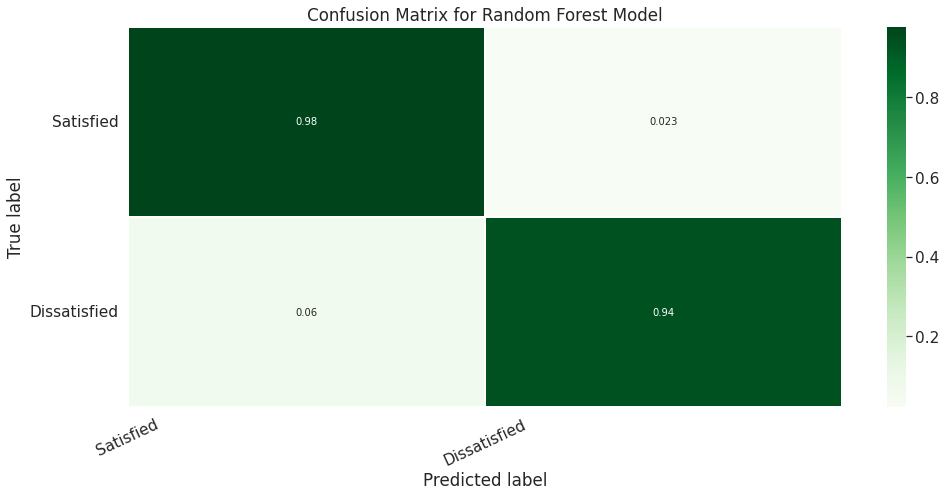

In [22]:
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Satisfied', 'Dissatisfied']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [23]:
print(classification_report(val_y, rf_val_predictions))
#the best one with F1 = 0.96

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14751
           1       0.97      0.94      0.95     11225

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



In [24]:
filename = 'finalized_model.sav'
pickle.dump(rf_model, open(filename, 'wb'))

In [25]:
#scaler = MinMaxScaler(feature_range=(0, 1))
#X = scaler.fit_transform(X)
scores = []
all_predictions = np.array([])
all_y_tests = np.array([])
cv = KFold(n_splits=10, shuffle=True, random_state = 42)
for train_index, test_index in cv.split(flight_data):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)
    X_train, X_test, y_train, y_test = flight_data.drop(columns = ['satisfaction']).iloc[train_index], flight_data.drop(columns = ['satisfaction']).iloc[test_index], flight_data['satisfaction'][train_index], flight_data['satisfaction'][test_index]
    #rf_model = RandomForestClassifier()
    rf_model = DecisionTreeClassifier()
    #rf_model = KNeighborsClassifier(n_neighbors = 3)
    #rf_model = GaussianNB()
    rf_model.fit(X_train, y_train)
    rf_val_predictions = rf_model.predict(X_test)
    all_predictions = np.append(all_predictions, rf_val_predictions)
    all_y_tests = np.append(all_y_tests, y_test)

Train Index:  [     0      1      2 ... 103901 103902 103903] 

Test Index:  [    23     35     39 ... 103886 103889 103899]
Train Index:  [     0      1      2 ... 103900 103901 103902] 

Test Index:  [     8     24     88 ... 103894 103896 103903]
Train Index:  [     0      1      2 ... 103901 103902 103903] 

Test Index:  [    12     17     34 ... 103870 103879 103890]
Train Index:  [     0      2      3 ... 103901 103902 103903] 

Test Index:  [     1      6      7 ... 103867 103868 103876]
Train Index:  [     0      1      2 ... 103901 103902 103903] 

Test Index:  [     4     21     32 ... 103841 103872 103874]
Train Index:  [     1      2      3 ... 103901 103902 103903] 

Test Index:  [     0     11     13 ... 103883 103891 103892]
Train Index:  [     0      1      2 ... 103901 103902 103903] 

Test Index:  [     3      9     10 ... 103862 103866 103895]
Train Index:  [     0      1      2 ... 103900 103901 103903] 

Test Index:  [    14     16     29 ... 103878 103897 103902]


In [26]:
print(classification_report(all_y_tests, all_predictions))

              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95     58879
         1.0       0.94      0.94      0.94     45025

    accuracy                           0.95    103904
   macro avg       0.95      0.95      0.95    103904
weighted avg       0.95      0.95      0.95    103904



In [27]:
#Decision Tree
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)


Accuracy: 0.9445335557551648


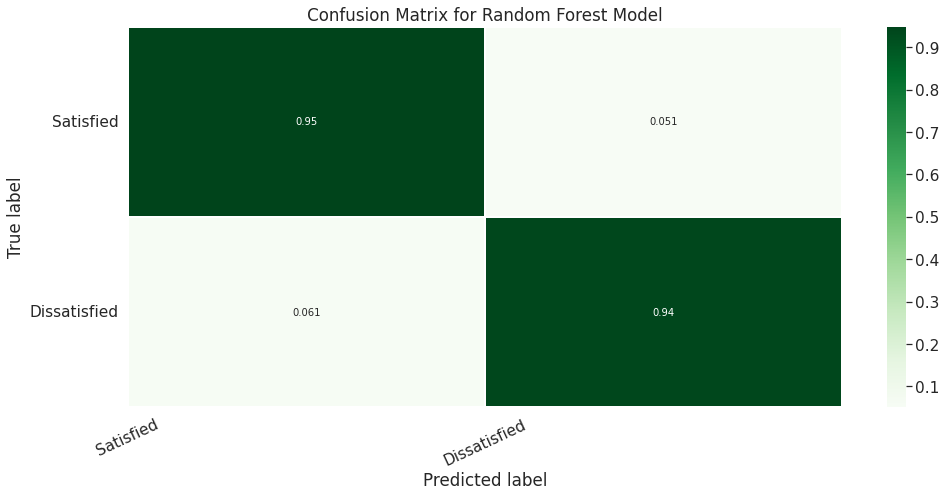

In [28]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
matrix  = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Satisfied', 'Dissatisfied']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [29]:
print(classification_report(y_test, y_pred))
#F1 = 0.95

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     17692
           1       0.93      0.94      0.94     13480

    accuracy                           0.94     31172
   macro avg       0.94      0.94      0.94     31172
weighted avg       0.94      0.94      0.94     31172



In [30]:
#dot_data = StringIO()
#export_graphviz(clf, out_file=dot_data,  
#                filled=True, rounded=True,
#                special_characters=True,feature_names = features,class_names=['0','1'])
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#graph.write_png('Flight_decision_Tree.png')
#Image(graph.create_png())

In [31]:
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=3)

In [32]:
#show first 5 model predictions on the test data
y_pred = knn.predict(X_test)

In [33]:
#check accuracy of our model on the test data
knn.score(X_test, y_test)

0.7372118762330976

Accuracy: 0.7372118762330976


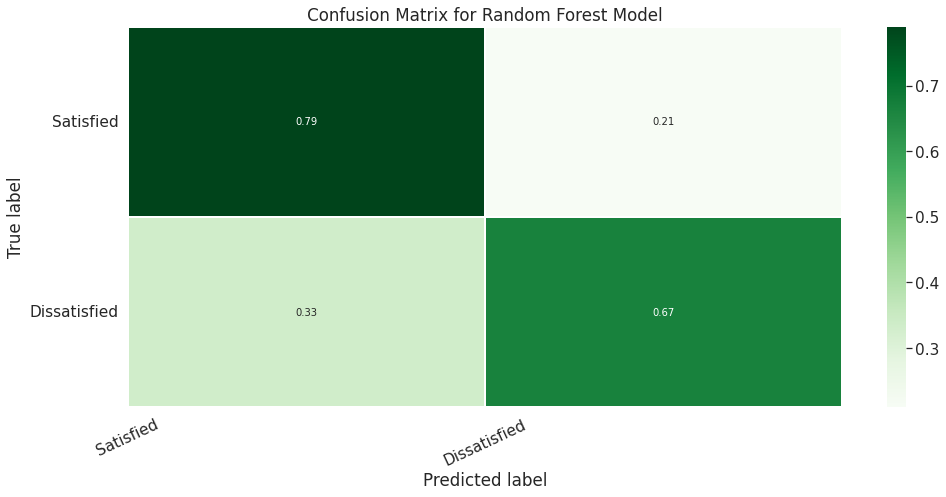

In [34]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
matrix  = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Satisfied', 'Dissatisfied']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [35]:
print(classification_report(y_test, y_pred))
#F1 = 0.74

              precision    recall  f1-score   support

           0       0.76      0.79      0.77     11776
           1       0.71      0.67      0.69      9005

    accuracy                           0.74     20781
   macro avg       0.73      0.73      0.73     20781
weighted avg       0.74      0.74      0.74     20781



In [36]:
nbModel = GaussianNB()
nbModel.fit(X_train, y_train)
GaussianNB(priors=None, var_smoothing=1e-09)
y_pred = nbModel.predict(X_test)


Accuracy: 0.8652134161012464


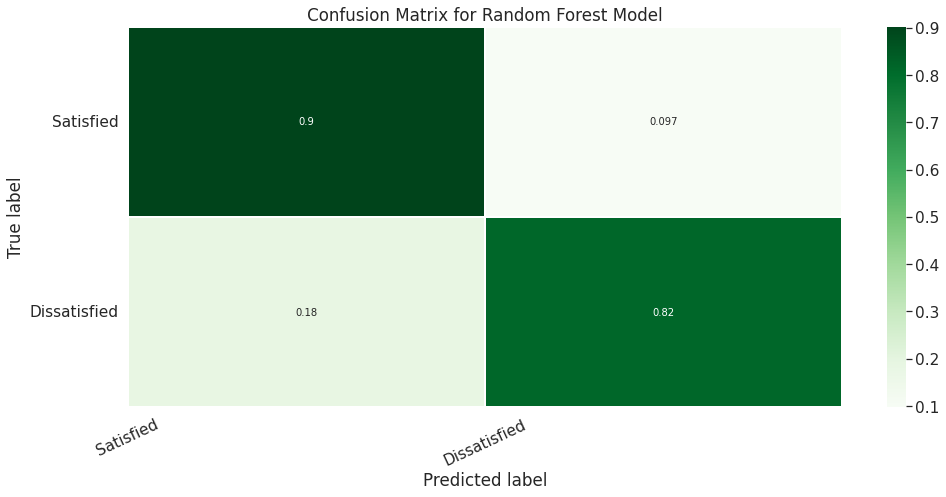

In [37]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
matrix  = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Satisfied', 'Dissatisfied']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [38]:
print(classification_report(y_test, y_pred))
# F1 = 0.87

              precision    recall  f1-score   support

           0       0.87      0.90      0.88     11776
           1       0.86      0.82      0.84      9005

    accuracy                           0.87     20781
   macro avg       0.87      0.86      0.86     20781
weighted avg       0.87      0.87      0.86     20781

